## Integrated Pulmonary Fibrosis (PF) cell atlas: stromal cell subset

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

# making sure plots & clusters are reproducible
np.random.seed(42)

# custom functions
import sc_toolbox as sct

Running Scanpy 1.8.2, on 2022-12-30 10:23.


In [2]:
## path variables
adata_dir = '/home/niklas/data/210514_IPF_atlas_human/'
project_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/01_data/'

In [3]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/02_figures/mesenchyme_subset/'
sc.settings.figdir = fig_dir
sc.set_figure_params(vector_friendly = True)
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## load anndata object
adata = sc.read(adata_dir + '220202_mesenchyme_subset_annotated_NIKLAS.h5ad')

In [5]:
## have a look at the adata object: 19412 cells
adata

AnnData object with n_obs × n_vars = 19412 × 61661
    obs: 'data_set', 'disease', 'enriched', 'health_state', 'in_integrated', 'name', 'patient', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain_2', 'domain', 'cell_type', 'meta_celltype', 'patient_id', 'disease_long', 'age', 'age_status', 'gender', 'internal_id', 'smoke_status', 'ever_smoker', 'published_cell_type', 'published_category', 'integrated', 'disease_patient', 'dge_celltype', 'cell_type_group', 'cell_type_niklas'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'highly_variable'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'cell_type_niklas_colors', 'data_set_colors', 'dge_celltype_colors', 'domain_colors', 'health_state_colors', 'meta_celltype_colors', 'neighbors', 'pca', 'published_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    l

### Pre-process data for visualization

#### Remove outlier with dbscan

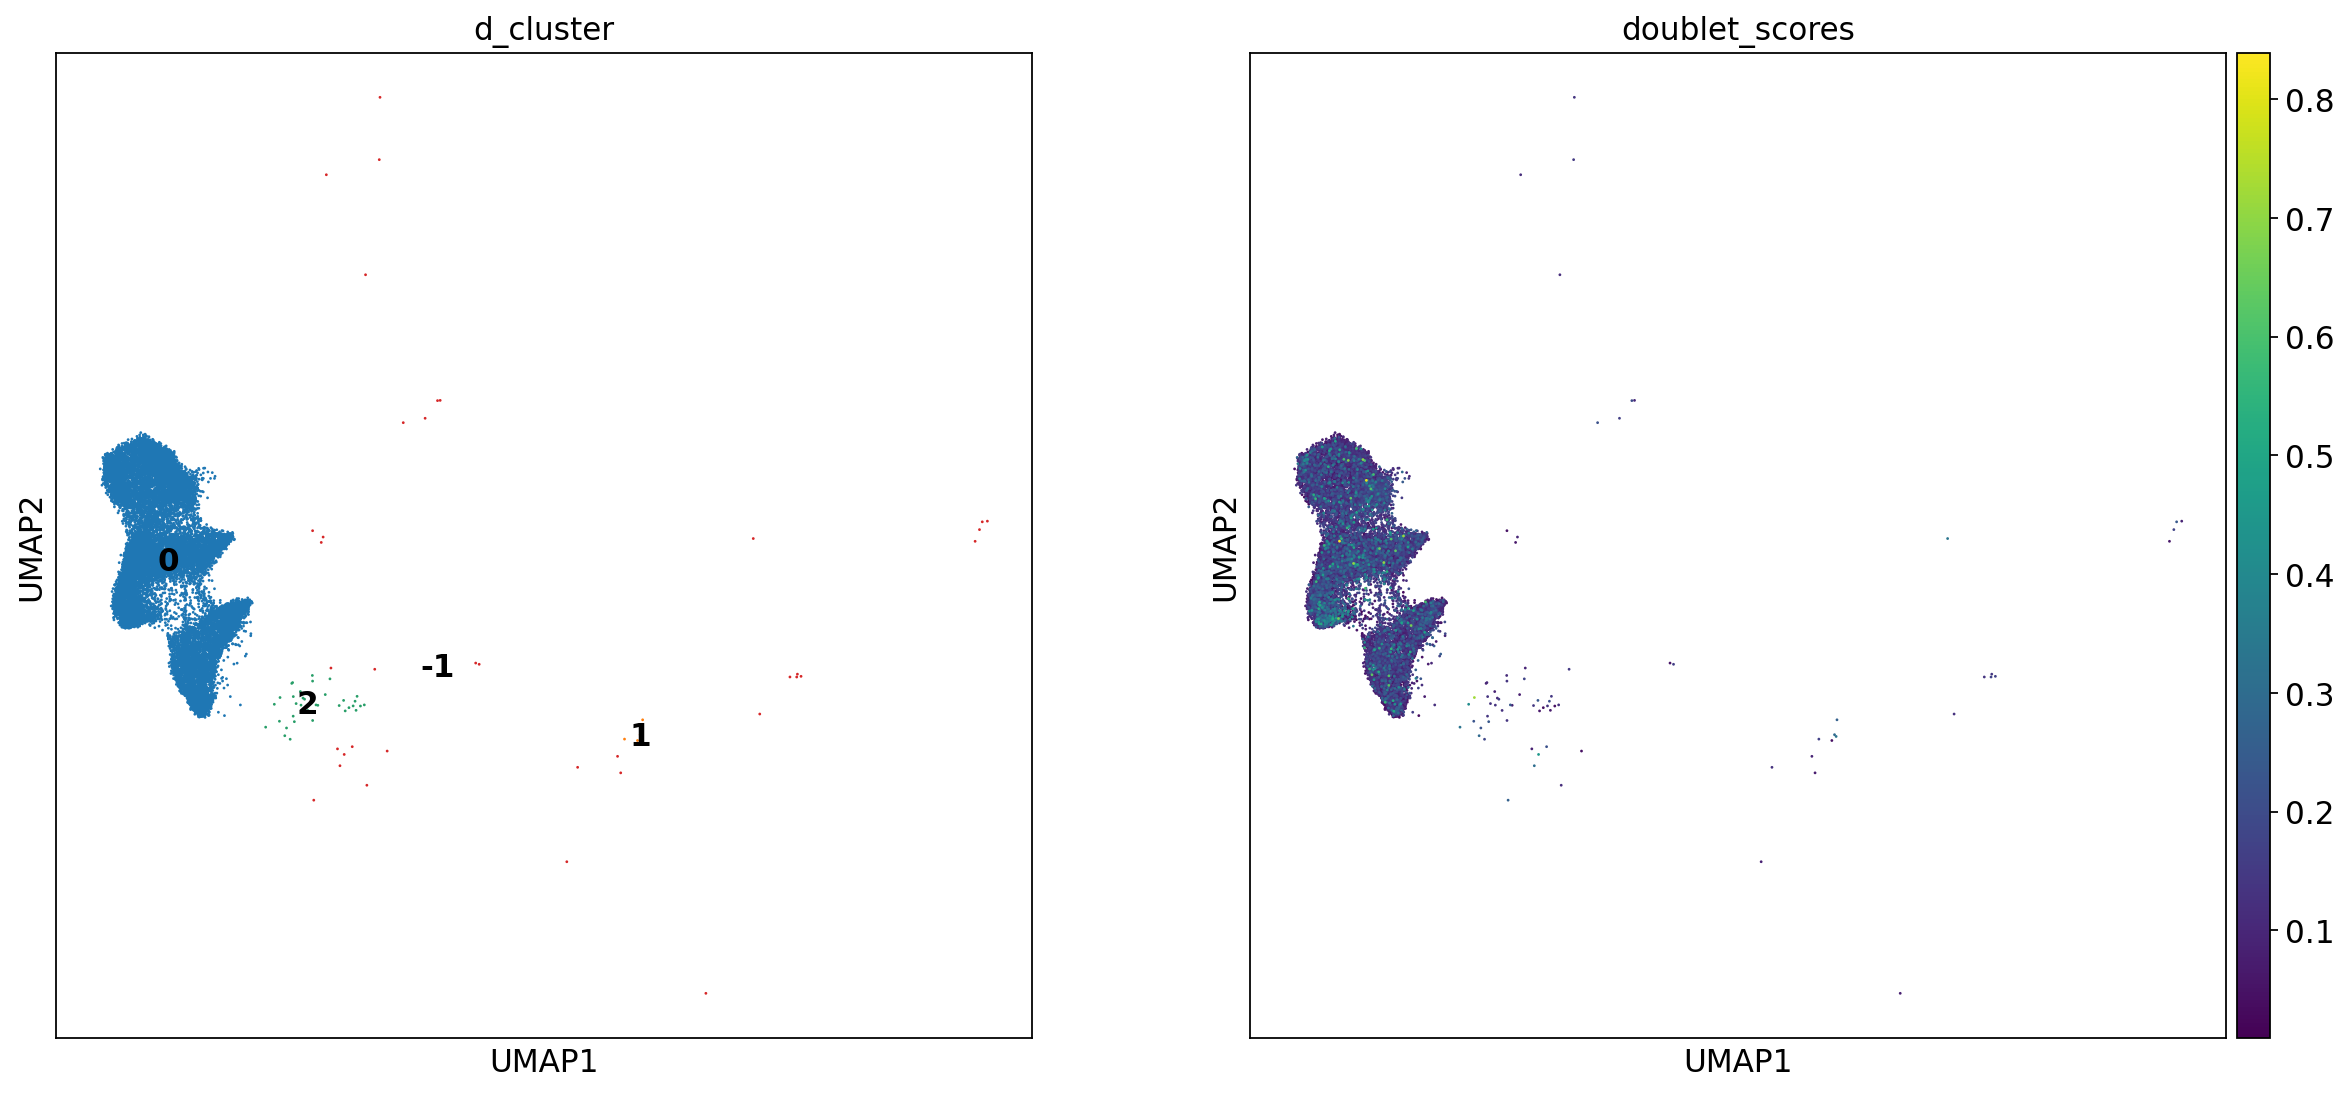

In [6]:
## using Herbert's old code snippet here
from natsort import natsorted
from sklearn.cluster import DBSCAN
def cluster_by_dscan(cords, eps, min_samples):
    clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(cords)
    return clustering.labels_

adata.obs['d_cluster'] = cluster_by_dscan(adata.obsm['X_umap'], eps = 0.5, min_samples = 5)
c = adata.obs['d_cluster'].astype('U')
adata.obs['d_cluster'] = pd.Categorical(c, categories = natsorted(np.unique(c)))

sc.pl.umap(adata, color = ['d_cluster','doublet_scores'], legend_loc='on data')

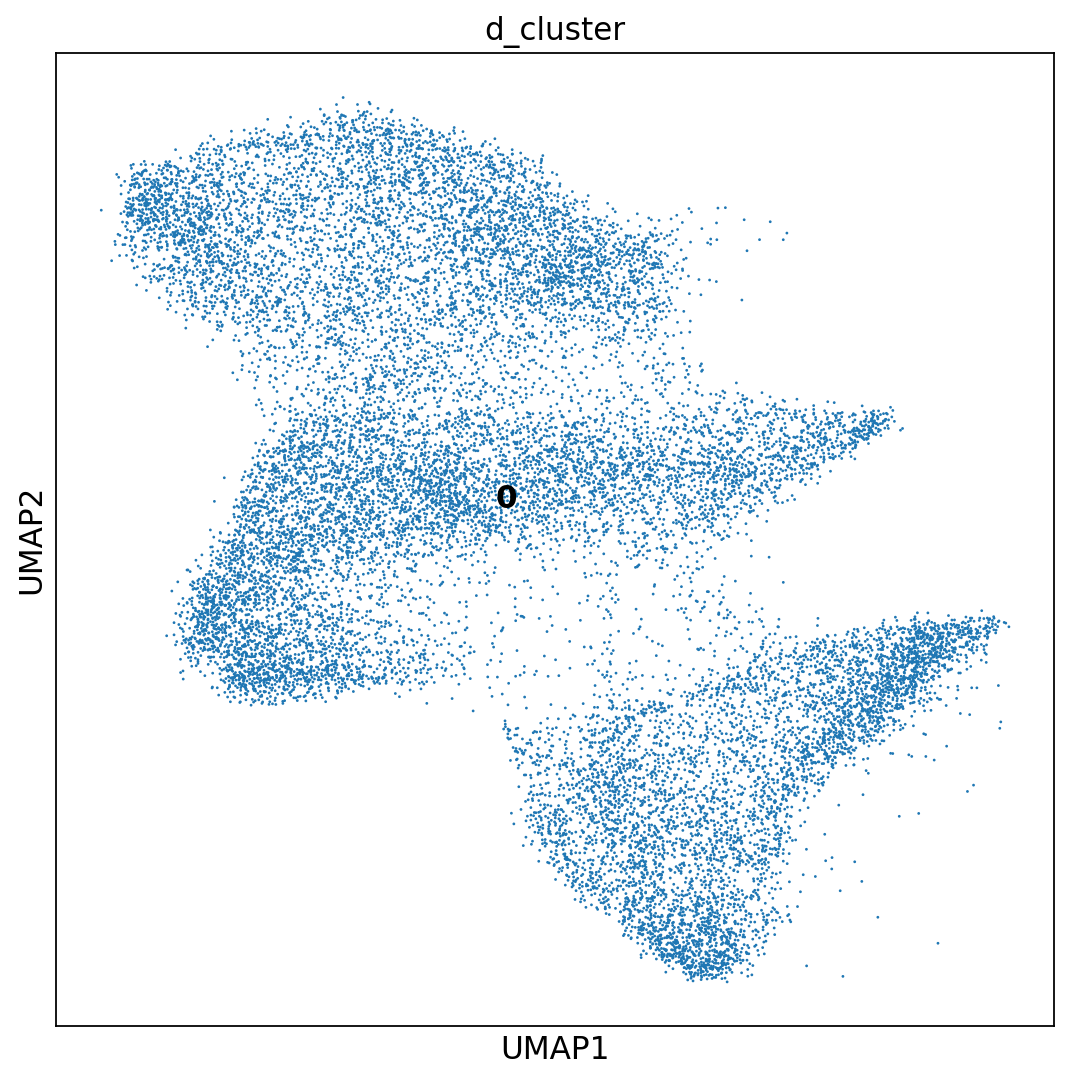

In [7]:
## discard outliers
adata = adata[adata.obs['d_cluster'].isin(['0'])].copy()
sc.pl.umap(adata, color = ['d_cluster'], legend_loc='on data')

In [8]:
adata

AnnData object with n_obs × n_vars = 19335 × 61661
    obs: 'data_set', 'disease', 'enriched', 'health_state', 'in_integrated', 'name', 'patient', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain_2', 'domain', 'cell_type', 'meta_celltype', 'patient_id', 'disease_long', 'age', 'age_status', 'gender', 'internal_id', 'smoke_status', 'ever_smoker', 'published_cell_type', 'published_category', 'integrated', 'disease_patient', 'dge_celltype', 'cell_type_group', 'cell_type_niklas', 'd_cluster'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'highly_variable'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'cell_type_niklas_colors', 'data_set_colors', 'dge_celltype_colors', 'domain_colors', 'health_state_colors', 'meta_celltype_colors', 'neighbors', 'pca', 'published_cell_type_colors', 'umap', 'd_cluster_colors'
    obsm: 'X_pca

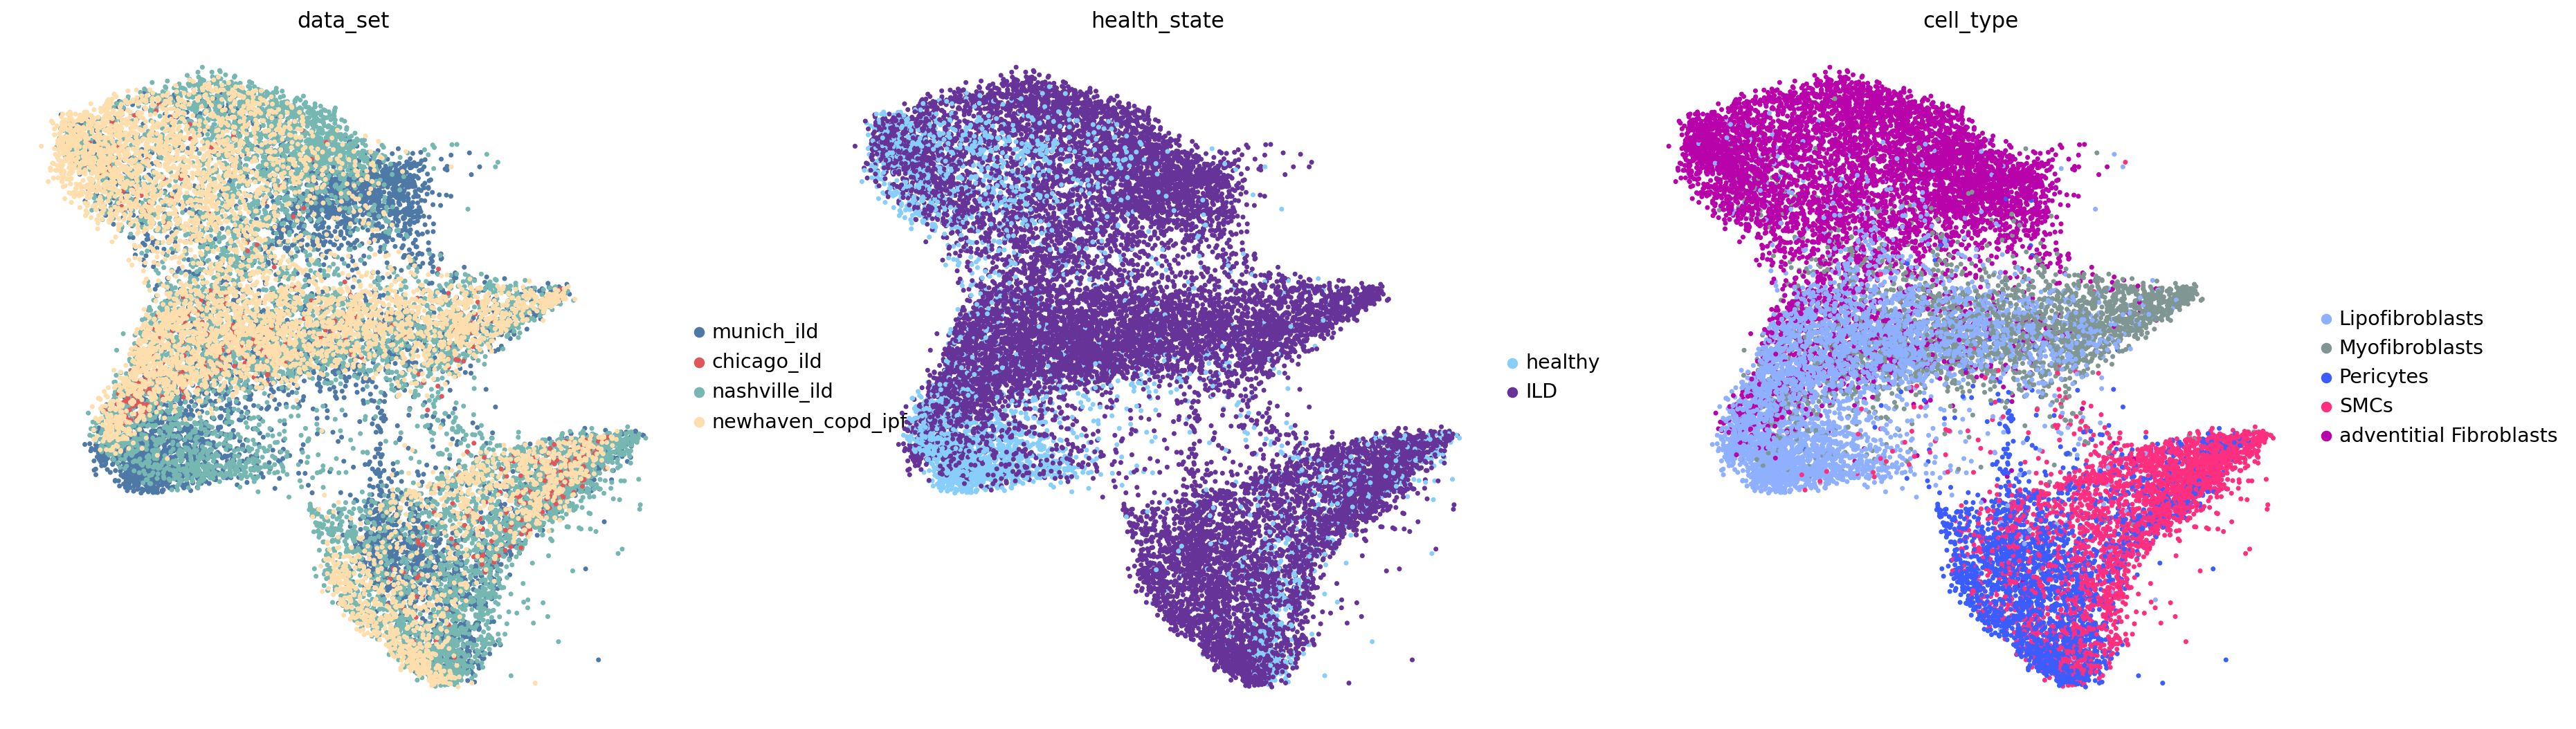

In [8]:
sc.pl.umap(adata, color = ['data_set','health_state','cell_type'], size = 40,
           ncols = 3, frameon = False)

### Overview UMAPs for supplementary figures

In [9]:
ct_colors = sb.color_palette()

In [10]:
def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())

In [11]:
adata

AnnData object with n_obs × n_vars = 19335 × 61661
    obs: 'data_set', 'disease', 'enriched', 'health_state', 'in_integrated', 'name', 'patient', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain_2', 'domain', 'cell_type', 'meta_celltype', 'patient_id', 'disease_long', 'age', 'age_status', 'gender', 'internal_id', 'smoke_status', 'ever_smoker', 'published_cell_type', 'published_category', 'integrated', 'disease_patient', 'dge_celltype', 'cell_type_group', 'cell_type_niklas', 'd_cluster'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'highly_variable'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'cell_type_niklas_colors', 'data_set_colors', 'dge_celltype_colors', 'domain_colors', 'health_state_colors', 'meta_celltype_colors', 'neighbors', 'pca', 'published_cell_type_colors', 'umap', 'd_cluster_colors'
    obsm: 'X_pca

In [12]:
adata.obs['cell_type_niklas'] = ['Fibroblasts' if ct in ['adventitial Fibroblasts','Lipofibroblasts'] else ct for ct in adata.obs['cell_type']]

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type_niklas' as categorical


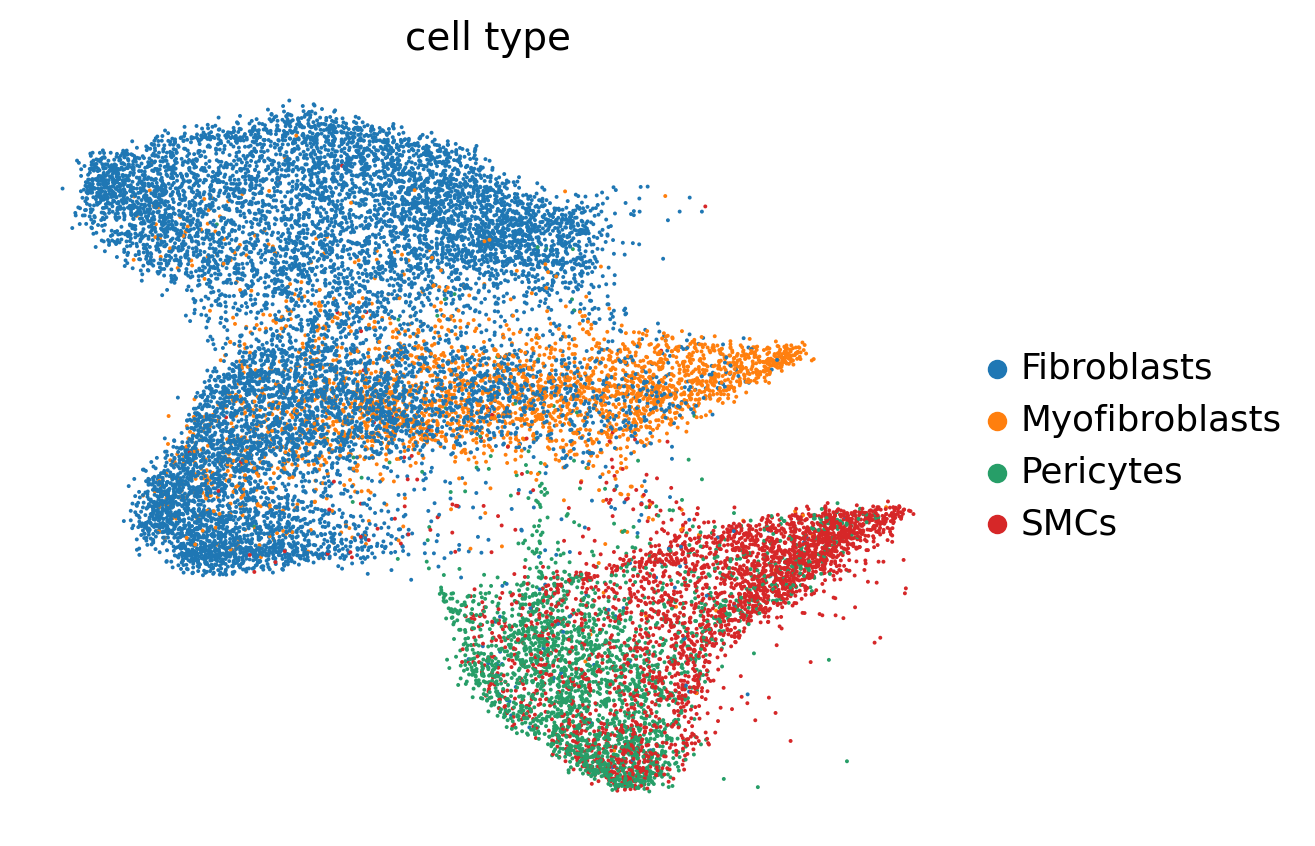

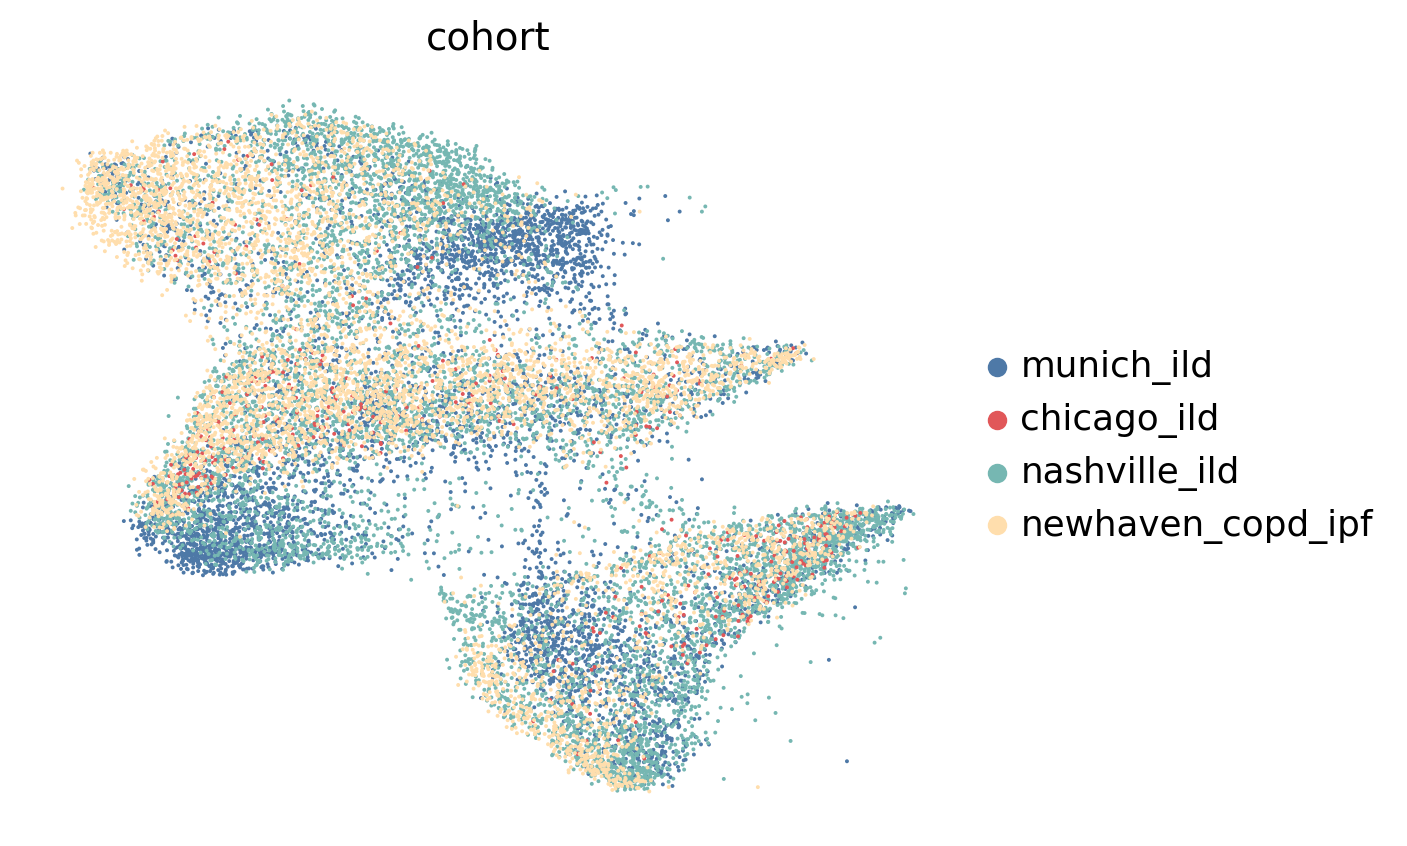

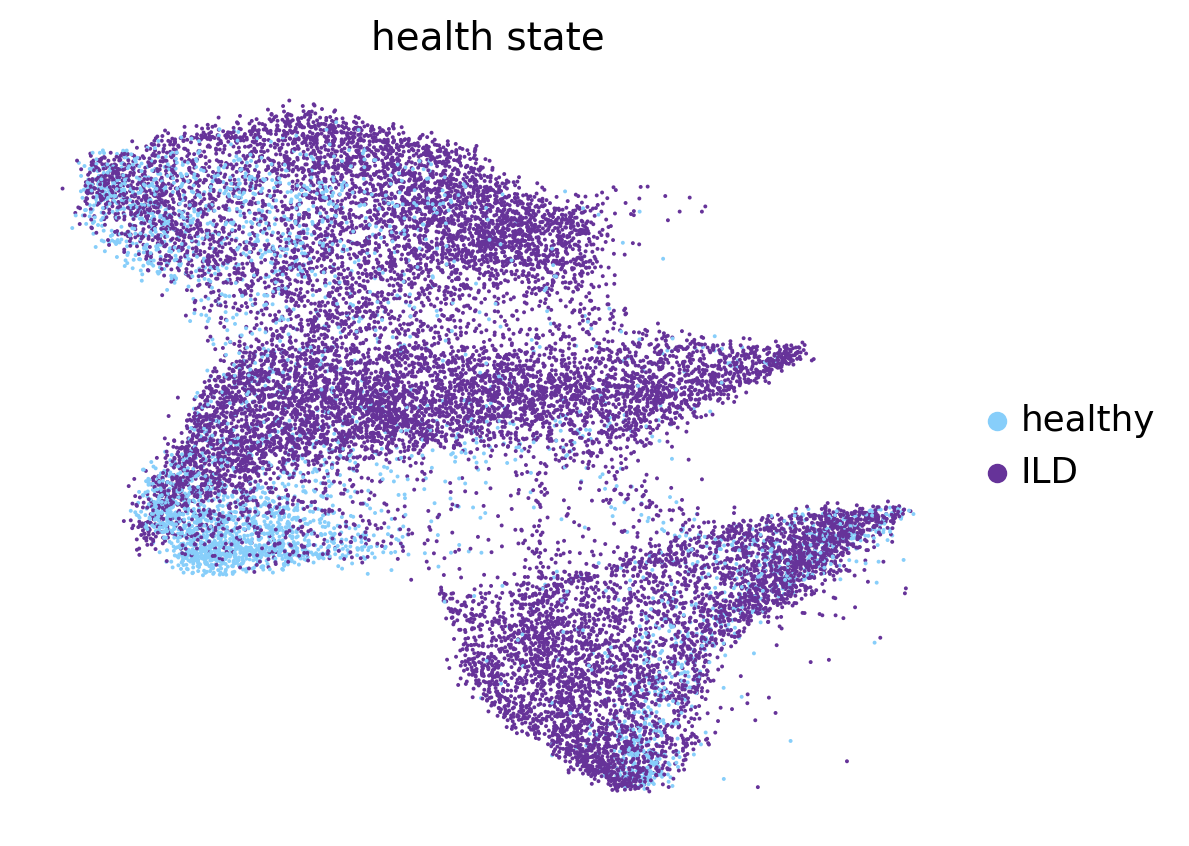

In [13]:
## cell type
sc.pl.umap(adata, color = ['cell_type_niklas'], title = 'cell type', frameon = False, palette = ct_colors,
           ax = mysize(6, 5, 100), size = 8, save = '_celltype.pdf')
## treatment
sc.pl.umap(adata, color = ['data_set'], title = 'cohort', frameon = False, 
           ax = mysize(6, 5, 100), size = 8, save = '_cohort.pdf')
## patient / sample ID
sc.pl.umap(adata, color = ['health_state'], title = 'health state', frameon = False,
           ax = mysize(6, 5, 100), size = 8, save = '_health_state.pdf')                           

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_type_niklas']`
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:37)


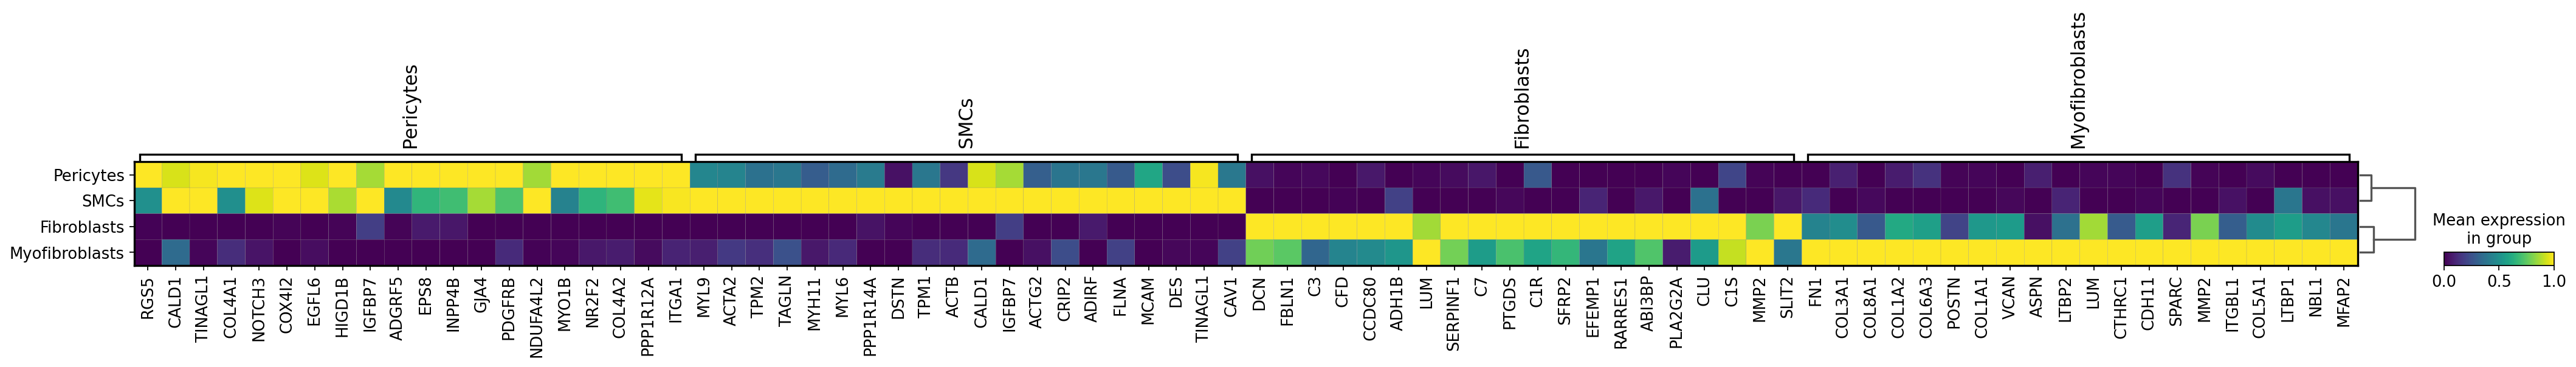

In [14]:
## automated heatmap
sc.tl.dendrogram(adata, groupby = 'cell_type_niklas')
sc.tl.rank_genes_groups(adata, groupby = 'cell_type_niklas', groups = 'all', use_raw = True, method = 'wilcoxon', n_genes=500)
sc.pl.rank_genes_groups_matrixplot(adata, n_genes = 20, standard_scale = 'var', save= 'auto_markers.pdf')

In [15]:
### custom heatmap
## matrixplot with marker genes
#celltype_markers={'AT1' : ['AGER','VEGFA','PDPN','HOPX','EMP2','CAV1','CLDN18','RTKN2','SPOCK2','AKAP5','SCEL'],
#                  'AT2' : ['SFTPC','SFTPA1','FASN','LRRK2','CSF3R','ETV5','ETV1'],
#                  'Aberrant basaloid' : ['LAMB3','LAMC2','PRSS2','CDH2','CDH3','MMP7','EPHB2','CDH2','TNC','SOX4'],
#                  'Basal' : ['KRT17','KRT15','KRT5','EYA2','AQP3','MT1X'],
#                  'Ciliated' : ['FOXJ1','CAPS','RSPH1','KCNE1B','TCTEX1D4','ANKRD66','DYDC2','C22orf15'],
#                  'Club':['SCGB3A2','CYB5A','ITGA9','MGP','CTSE'],
#                  'Goblet':['SCGB1A1','SCGB3A1','BPIFB1','MUC5B','LTF','WFDC2'],
#                  'Secretory' : ['MATR3','ZNF90','TMEM66','IL8']               
#}
#sc.pl.matrixplot(adata, celltype_markers, groupby = 'cell_type',standard_scale='var', dendrogram=False,
#                     save='curated_markers.pdf' )

### Compute invivo marker table as reference

In [16]:
## function to add pct expressed 
def add_pct(adata, tab, ids, group_by, thresh_min=0, gene_label='gene'):
    for ident in ids:
        
        # subset to cell type of interest
        cells_oi = adata.obs_names[adata.obs[group_by] == ident]
        # compute fraction (%) of cell type expressing each marker genes
        data_temp_oi = pd.DataFrame(((adata[cells_oi].layers['counts'] > 0).sum(0)
                / adata[cells_oi].layers['counts'].shape[0]).T, index=adata.var_names)
        
        # subset to all other cells (background)
        cells_background = adata.obs_names[adata.obs[group_by] != ident]
        # compute fraction (%) to background expressing each marker genes
        data_temp_background = pd.DataFrame(((adata[cells_background].layers['counts'] > 0).sum(0)
                / adata[cells_background].layers['counts'].shape[0]).T, index=adata.var_names)
        
        if gene_label == 'index':
            tab[f'pct_cell_type'] = data_temp_oi.reindex(tab.index.values).values
            tab[f'pct_background'] = data_temp_background.reindex(tab.index.values).values
        else:
            tab[f'pct_cell_type'] = data_temp_oi.reindex(tab.loc[:, gene_label]).values
            tab[f'pct_background'] = data_temp_background.reindex(tab.loc[:, gene_label]).values
    return tab

In [17]:
label = 'cell_type'

In [18]:
## computer overall marker genes for each and every cell type
sc.tl.rank_genes_groups(adata, groupby = label, method = 'wilcoxon')

## create marker table
result = adata.uns['rank_genes_groups']
all_markers = []
for cell_type in result['names'].dtype.names:
    ct_table = pd.DataFrame({'gene': result['names'][cell_type], 'score': result['scores'][cell_type],
                            'logfoldchange': result['logfoldchanges'][cell_type], 'pval': result['pvals'][cell_type],
                            'pval_adj': result['pvals_adj'][cell_type], 'cell_type': cell_type})
    # compute pct expressed for cell type and background
    ct_table = add_pct(adata, ct_table, [cell_type], group_by = 'cell_type')
    # append to all markers table
    all_markers.append(ct_table)
    
## concat into pandas df  
all_markers = pd.concat(all_markers)

## filter by p value
all_markers = all_markers[all_markers.pval_adj < 0.1].copy()
## only consider genes expressed in at least 25% of cells of cell type of interest
all_markers = all_markers[all_markers.pct_cell_type > 0.25].copy()
## sort final all markers table by cell type and logFC
all_markers = all_markers.sort_values(['cell_type','logfoldchange','score'], ascending=[True,False,True])
all_markers.head()

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:38)


gene      score  logfoldchange           pval       pval_adj  \
9     CCBE1  31.372486       3.400553  4.802889e-216  2.961509e-212   
25     NEBL  24.196615       3.376806  2.414902e-129  4.803396e-126   
27  CACNA1D  23.788694       3.301597  4.372718e-125  7.489616e-122   
3     ROBO2  34.325451       2.812416  3.274546e-258  5.047794e-254   
0    LIMCH1  43.271721       2.722081   0.000000e+00   0.000000e+00   

          cell_type  pct_cell_type  pct_background  
9   Lipofibroblasts       0.365268        0.060219  
25  Lipofibroblasts       0.277855        0.038817  
27  Lipofibroblasts       0.284615        0.053240  
3   Lipofibroblasts       0.465501        0.156597  
0   Lipofibroblasts       0.558508        0.160784

In [19]:
# save all markers table
all_markers.to_csv(project_dir + '220202_CPC_IPF_reference_mesenchyme_markers_table_celltype_OVERALL.csv')

### Cell type frequencies invivo

In [20]:
## frequency table
xlabel = 'health_state'
cell_types_label = 'cell_type_niklas'
cols = adata.uns['cell_type_niklas_colors']
celltypes = adata.obs[cell_types_label].cat.categories

relFreqs = sct.calc.relative_frequencies(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
relFreqs.head(2)

Fibroblasts  Myofibroblasts  Pericytes      SMCs health_state
001C     0.937500             0.0     0.0625  0.000000      healthy
003C     0.902439             0.0     0.0000  0.097561      healthy

In [21]:
order = ['healthy','ILD']

Saving Figure to /home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/02_figures/me
senchyme_subset/rel_freqs.pdf

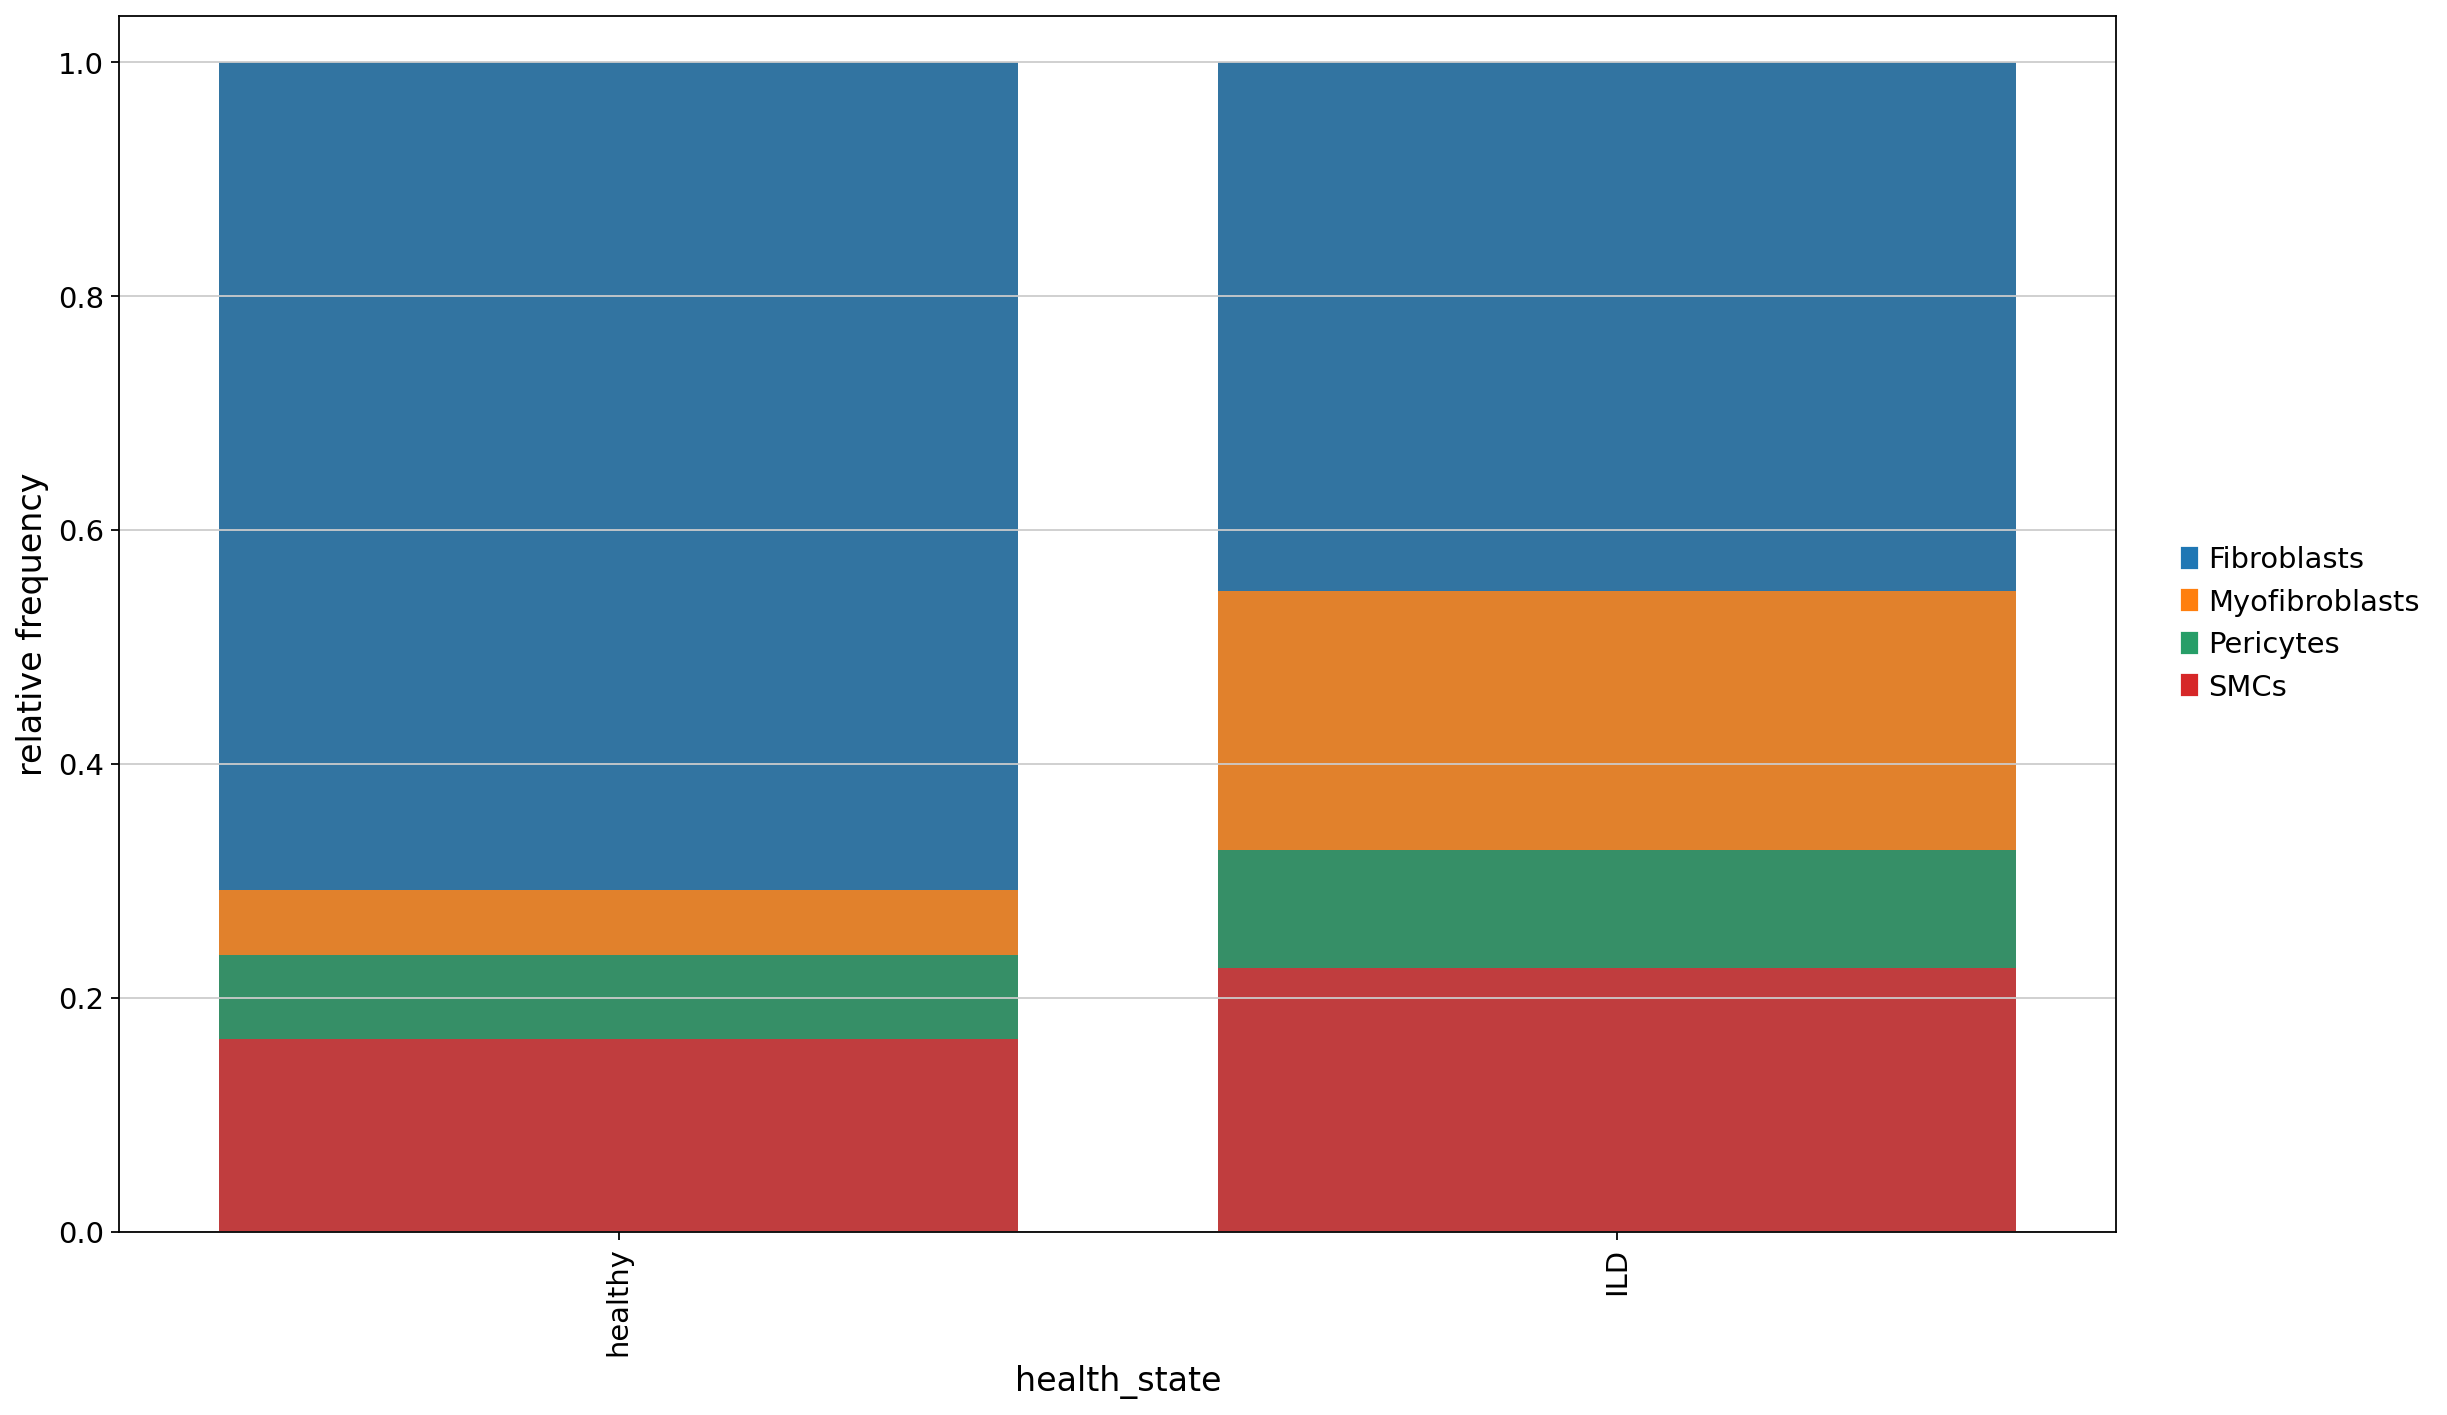

In [22]:
## cell type frequencies per treatment category
sct.plot.cluster_composition_stacked_barplot(relFreqs, xlabel = xlabel, figsize = (16,10), order = order,
                              colors = list(cols), width = 0.8,
                                             save = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/02_figures/mesenchyme_subset/rel_freqs.pdf')